In [1]:
#importing important packages and reading the csv file
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
stop_words
df=pd.read_csv(r'C:\Users\hp\Downloads\amazon_alexa.tsv',delimiter='\t')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
#normalistion:converting all texts into lower case
df['verified_reviews']=df['verified_reviews'].apply(lambda x:str(x).lower())
df.head()



,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo!,1
1,5,31-Jul-18,Charcoal Fabric,loved it!,1
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [4]:
#pre processing:removing all non alphabets
df['verified_reviews']=df['verified_reviews'].str.replace(r'\d(.*)',' ')
df['verified_reviews']=df['verified_reviews'].apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
df['verified_reviews']=df['verified_reviews'].apply(lambda x:(' ').join([w for w in x.split(' ') if not w=='']))
df.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [5]:
#stemming:remove inflectional endings of same word
from nltk.tokenize import word_tokenize
df['verified_reviews']=df['verified_reviews'].apply(lambda x:(' ').join([ps.stem(w) for w in nltk.word_tokenize(x) if not w in stop_words]))
df['verified_reviews']


0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3                                           lot fun thing
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti great mostli use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [1]:
#postag:parts of speech tagging of words and selecting only words of interest
from nltk.tokenize import word_tokenize
a=re.compile(r'NN(.*)')
b=re.compile(r'RB(.*)')
c=re.compile(r'JJ(.*)')
d=re.compile(r'VB(.*)')
for i in range(3150):
    doc=nltk.word_tokenize(df['verified_reviews'][i])
    postag=nltk.pos_tag(doc)
    postag=[s for s in postag if (a.search(s[1])!=None or b.search(s[1])!=None or c.search(s[1])!=None or d.search(s[1])!=None )]
    df['verified_reviews'][i]=(' ').join([s[0] for s in postag])
df['verified_reviews']


NameError: name 're' is not defined

In [7]:
#word count:counting words in each document and in total
df['word_count']=df['verified_reviews'].apply(lambda x:len([w for w in x.split(' ')]))
totwords=0
for i in range(3150):
    totwords=totwords+int(df['word_count'][i])
totwords


29961

In [8]:
#display word count of top 100 words
freq=pd.Series(' '.join(df['verified_reviews']).split()).value_counts()[:20]
freq

love       976
echo       699
great      668
use        621
work       559
alexa      480
music      466
sound      371
easi       318
set        316
get        286
play       278
dot        265
devic      263
product    257
speaker    238
good       234
thing      225
time       202
amazon     187
dtype: int64

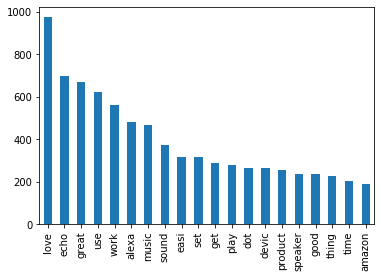

In [10]:
#plotting the words based on their word counts
plot=freq.plot.bar()
plot



In [11]:
#countvectorizer:converting words into a matrix of count and using ngram feature
corpora=[]
for i in range(3150):
      corpora.append(df['verified_reviews'][i])
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words=stop_words,ngram_range=(1,2))
vec=cv.fit(corpora)
x=cv.transform(corpora)
feature_names=vec.get_feature_names()

In [15]:
#list of features
feature_names[:50]

['abay',
 'abay monitor',
 'abc',
 'abd',
 'abd start',
 'abil',
 'abil adjust',
 'abil alexa',
 'abil contact',
 'abil control',
 'abil creat',
 'abil day',
 'abil exampl',
 'abil fall',
 'abil got',
 'abil listen',
 'abil make',
 'abil multipl',
 'abil music',
 'abil night',
 'abil play',
 'abil respond',
 'abil see',
 'abil shop',
 'abil talk',
 'abil watch',
 'abl',
 'abl access',
 'abl add',
 'abl answer',
 'abl call',
 'abl complet',
 'abl connect',
 'abl control',
 'abl download',
 'abl easili',
 'abl explor',
 'abl find',
 'abl follow',
 'abl get',
 'abl hear',
 'abl hook',
 'abl idea',
 'abl instal',
 'abl interpret',
 'abl link',
 'abl listen',
 'abl make',
 'abl manag',
 'abl name']

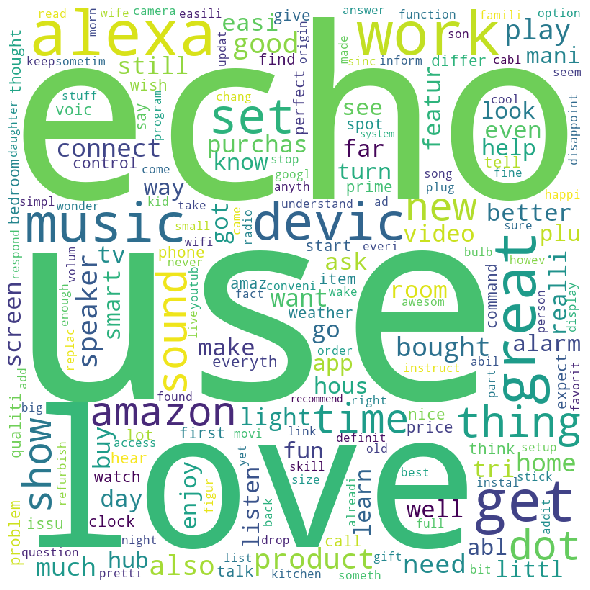

In [13]:
#making a word cloud
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stop_words,min_font_size = 10).generate(' '.join(feature_names)) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [14]:
#displaying keywords:sorting keywords based on countvectorizer
sum_words=x.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(' TOP 100 KEYWORDS ARE:')
for i in range(100):
    print(words_freq[i][0],':',words_freq[i][1])

 TOP 100 KEYWORDS ARE:
love : 976
echo : 699
great : 668
use : 621
work : 559
alexa : 480
music : 466
sound : 371
easi : 318
set : 316
get : 286
play : 278
dot : 265
devic : 263
product : 257
speaker : 238
good : 234
thing : 225
time : 202
amazon : 187
home : 182
still : 181
show : 171
bought : 168
new : 162
purchas : 155
echo dot : 155
work great : 155
learn : 153
much : 152
realli : 151
smart : 149
better : 147
qualiti : 146
fun : 145
ask : 142
prime : 142
connect : 141
need : 140
day : 140
well : 137
light : 136
also : 131
far : 130
easi set : 129
want : 123
got : 121
listen : 121
alarm : 117
tv : 114
play music : 111
room : 111
love echo : 106
everyth : 106
make : 105
featur : 102
turn : 100
even : 99
video : 99
buy : 99
plu : 98
hous : 97
enjoy : 95
go : 94
abl : 90
littl : 90
nice : 90
tri : 88
weather : 87
clock : 87
spot : 85
sound qualiti : 83
tell : 83
look : 82
great product : 82
screen : 82
know : 81
amaz : 80
expect : 79
price : 79
hub : 79
mani : 78
easi use : 78
voic : 7